In [ ]:
!wget https://www.dropbox.com/s/hv4r8gz7t6jbfup/images.zip?dl=0

--2020-03-25 22:40:35--  https://www.dropbox.com/s/hv4r8gz7t6jbfup/images.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hv4r8gz7t6jbfup/images.zip [following]
--2020-03-25 22:40:35--  https://www.dropbox.com/s/raw/hv4r8gz7t6jbfup/images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc24f8e62f8490feeaa74b6593aa.dl.dropboxusercontent.com/cd/0/inline/A0mRqvWc8AiV-4jscr3j0Gsg8AiV0KVyoakV5Dh0kTgVae-1BQyedsmCaJJ3b8FSU6cmtytEEhT8UHO4f-duxWNbQDNhdWjTIKZHhCnuWL2zQoBnaDJtzeQJZRMo0Y_RTJo/file# [following]
--2020-03-25 22:40:35--  https://uc24f8e62f8490feeaa74b6593aa.dl.dropboxusercontent.com/cd/0/inline/A0mRqvWc8AiV-4jscr3j0Gsg8AiV0KVyoakV5Dh0kTgVae-1BQyedsmCaJJ3b8FSU6cmtytEEhT8UHO4f-duxWNbQDNhdWjTIKZHhCnuWL2zQoBn

In [ ]:
!unzip images.zip?dl=0 -d "train/"

Archive:  images.zip?dl=0
  inflating: train/images/F5.png     
  inflating: train/images/F6.png     


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
def preprocess(img_path):
  img=image.load_img(img_path,target_size=(128,128))
  img_array=image.img_to_array(img)
  #plt.axis('off')
  img_array/=255.0
  #plt.imshow(img_array)
  #plt.show()
  return img_array

In [ ]:
import os
path='train/images'

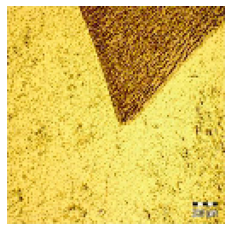

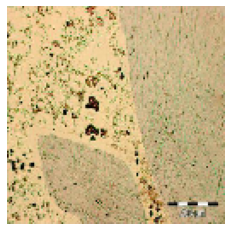

In [ ]:
# lets visualise images:
for images in os.listdir(path):
  preprocess(os.path.join(path,images))

In [ ]:
# now there is shortage of data: lets prepare data: 
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rescale=1/255.0,
    zoom_range=0.3,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip=True
)

In [ ]:
# lets augument Ist Image:
img=preprocess('train/images/F5.png')
print(img.shape)
img=img.reshape((1,*img.shape))
print(img.shape)

(128, 128, 3)
(1, 128, 128, 3)


In [ ]:
os.mkdir('Data_1')

In [ ]:
i=0
for batch in datagen.flow(img,batch_size=1,save_to_dir="Data_1",save_format='.jpg'):
  i+=1
  if i>10000:
    break

In [ ]:
img=preprocess('train/images/F6.png')
print(img.shape)
img=img.reshape((1,*img.shape))
print(img.shape)

(128, 128, 3)
(1, 128, 128, 3)


In [ ]:
os.mkdir('Data_2')

In [ ]:
i=0
for batch in datagen.flow(img,batch_size=1,save_to_dir="Data_2",save_format='.jpg'):
  i+=1
  if i>10000:
    break

In [ ]:
# lets Prepare Labels :
count=0
for  images  in os.listdir('Data_1'):
  count+=1
print(count)

6303


In [ ]:
count=0
for  images  in os.listdir('Data_2'):
  count+=1
print(count)

6334


In [ ]:
# lets Prepare Data:
X=[]
Y=[]

In [ ]:
for images in os.listdir('Data_1'):
  X.append(preprocess(os.path.join('Data_1',images)))
  Y.append(0)

In [ ]:
for images in os.listdir('Data_2'):
  X.append(preprocess(os.path.join('Data_2',images)))
  Y.append(1)

In [ ]:
print(np.argmax(Y[7000]))

1


In [ ]:
from keras.utils import to_categorical
Y=to_categorical(Y)

In [ ]:
import numpy as np
X=np.array(X)
Y=np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(12637, 128, 128, 3)
(12637, 2)


In [ ]:
# lets define our model :
from keras.models import Sequential
from keras.layers import *

In [ ]:
model=Sequential()
model.add(Convolution2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)        

In [ ]:
# lets compile our model :
model.compile(loss='binary_crossentropy',metrics=['acc'],optimizer='adam')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint=ModelCheckpoint('best_model.h5',save_best_only=True,verbose=1,mode='auto',monitor='val_loss')
early_stop=EarlyStopping(monitor='val_loss',patience=15,verbose=1,mode='auto')

In [ ]:
hist=model.fit(X,Y,batch_size=32,epochs=500,callbacks=[checkpoint,early_stop],validation_split=0.2,shuffle=True)




Train on 10109 samples, validate on 2528 samples
Epoch 1/500





10109/10109 [==============================] - 22s 2ms/step - loss: 0.0188 - acc: 0.9898 - val_loss: 1.0960e-07 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to best_model.h5
Epoch 2/500
10109/10109 [==============================] - 7s 706us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/500
10109/10109 [==============================] - 7s 699us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/500
10109/10109 [==============================] - 7s 706us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/500
10109/10109 [==============================] - 7s 706us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0

In [ ]:
def reshape(array):
  array=array.reshape((1,*array.shape))
  return array

In [ ]:
print("Prediction is : "+ str(model.predict_classes(reshape(X[10]))))
print("Actual value is : "+ str(np.argmax(Y[10])))

Prediction is : [0]
Actual value is : 0


In [ ]:
print("Prediction is : "+ str(model.predict_classes(reshape(X[1234]))))
print("Actual value is : "+ str(np.argmax(Y[1234])))

Prediction is : [0]
Actual value is : 0


In [ ]:
print("Prediction is : "+ str(model.predict_classes(reshape(X[6000]))))
print("Actual value is : "+ str(np.argmax(Y[6000])))

Prediction is : [0]
Actual value is : 0


In [ ]:
label_to_class={"0":"Undissolved Ta and Nb ", "1": "Undissolved Tantalum"}